<a href="https://colab.research.google.com/github/Rafa-pb/rc2025.1/blob/main/lab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        resultado += '0' if a[i] == b[i] else '1'
    return resultado

def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).

    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).

    Returns:
        A string binária de r bits representando o CRC.
    """
    r = len(gerador_bits) - 1
    mensagem_aumentada = list(dados_bits + '0' * r)

    for i in range(len(dados_bits)):
        if mensagem_aumentada[i] == '1':
            janela = "".join(mensagem_aumentada[i : i + r + 1])
            resultado_xor = xor_bits(janela, gerador_bits)
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    return "".join(mensagem_aumentada[-r:])


In [ ]:
# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"     # G(x)

crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x):         {dados_teste}")
print(f"Gerador G(x):       {gerador_teste}")
print(f"CRC Calculado:      {crc_calculado}")
print(f"Quadro T(x):        {dados_teste + crc_calculado}")


Dados M(x):         1101011111
Gerador G(x):       10011
CRC Calculado:      0010
Quadro T(x):        11010111110010


Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 4500 bytes...
Analisando para mensagem de 9000 bytes...
Analisando para mensagem de 16000 bytes...
--- Resultados Finais ---
[{'tamanho': 1500, 'tempo_manual': 0.1062301000347361, 'mem_pico_manual': 105.7509765625, 'tempo_lib': 0.0398511000094004, 'mem_pico_lib': 1.453125}, {'tamanho': 4500, 'tempo_manual': 0.3248734999797307, 'mem_pico_manual': 316.7119140625, 'tempo_lib': 0.12602039997000247, 'mem_pico_lib': 1.21875}, {'tamanho': 9000, 'tempo_manual': 0.6874682999914512, 'mem_pico_manual': 633.1181640625, 'tempo_lib': 0.24517650000052527, 'mem_pico_lib': 1.21875}, {'tamanho': 16000, 'tempo_manual': 1.168284000013955, 'mem_pico_manual': 1125.2822265625, 'tempo_lib': 0.43269210000289604, 'mem_pico_lib': 1.21875}]


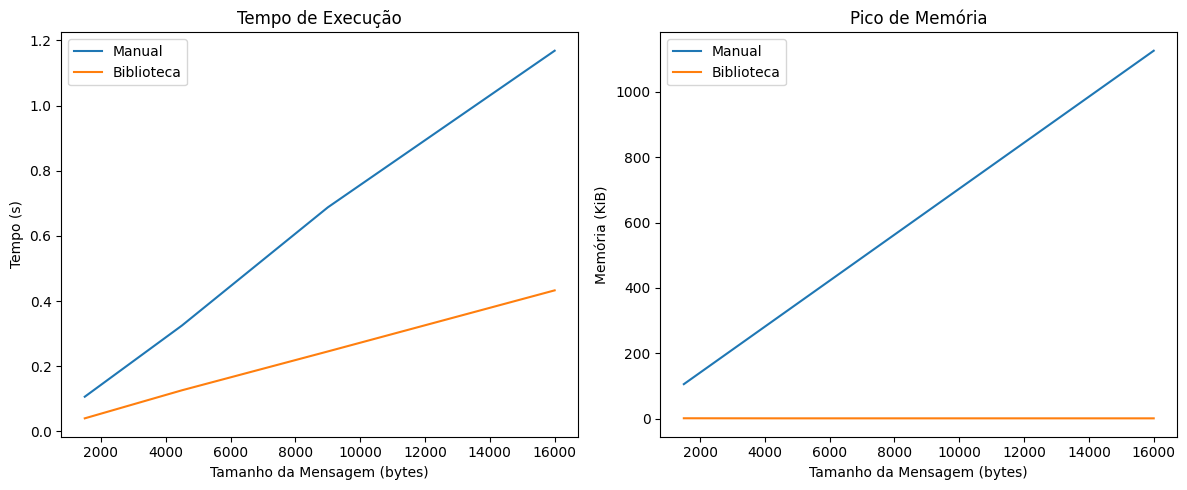

In [ ]:
import time
import tracemalloc
import os
from crc import Calculator, Crc16
import matplotlib.pyplot as plt

calculator_lib = Calculator(Crc16.MODBUS)
tamanhos_bytes = [1500, 4500, 9000, 16000]
resultados = []

for tamanho in tamanhos_bytes:
    print(f"Analisando para mensagem de {tamanho} bytes...")

    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)


    tracemalloc.start()
    start_time = time.perf_counter()

    crc_manual = calcular_crc_manual(mensagem_bits, "11000000000000101")

    end_time = time.perf_counter()
    mem_atual_manual, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tempo_manual = end_time - start_time

    tracemalloc.start()
    start_time = time.perf_counter()

    crc_lib = calculator_lib.checksum(mensagem_bytes)

    end_time = time.perf_counter()
    mem_atual_lib, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tempo_lib = end_time - start_time

    resultados.append({
        "tamanho": tamanho,
        "tempo_manual": tempo_manual,
        "mem_pico_manual": mem_pico_manual / 1024,
        "tempo_lib": tempo_lib,
        "mem_pico_lib": mem_pico_lib / 1024
    })

print("--- Resultados Finais ---")
print(resultados)

tamanhos = [l["tamanho"] for l in resultados]
tempos_manual = [l["tempo_manual"] for l in resultados]
tempos_lib = [l["tempo_lib"] for l in resultados]
mem_manual = [l["mem_pico_manual"] for l in resultados]
mem_lib = [l["mem_pico_lib"] for l in resultados]

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(tamanhos, tempos_manual, label="Manual")
plt.plot(tamanhos, tempos_lib, label="Biblioteca")
plt.title("Tempo de Execução")
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Tempo (s)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tamanhos, mem_manual, label="Manual")
plt.plot(tamanhos, mem_lib, label="Biblioteca")
plt.title("Pico de Memória")
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Memória (KiB)")
plt.legend()

plt.tight_layout()
plt.show()


Notebook Pessoal com:
    CPU: Intel Core i7-13700.
    GPU: RTX 4050
    RAM: 16GB

A abordagem com CRC foi consideravelmente mais eficiente, tanto no uso de memória como no de velocidade, em comparação com a implementação manual. Todo o motivo dessa descrepancia é no momento que a abordagem manual trata as strings intermediárias e usa operações de listas para resolver o problema. Enquanto a lib já tem funções optimizadas para isso.


PARTE 4:

4.1 a)

nome: Rafael

ASCCI: 01110010 01100001 01100110 01100001 01100101 01101100

matricula: 12311078**5** -> CRC/ARC

In [ ]:
mensagem_base = "011100100110000101100110011000010110010101101100"
gerador = "10001000000100001"

crc = calcular_crc_manual(mensagem_base, gerador)
print(crc)

1111011010110100



MENSAGEM: Rafael

MENSAGEM_BASE: 011100100110000101100110011000010110010101101100

CRC	1111011010110100



In [ ]:
def padrao_erro(pos, n_rajada, tamanho_quadro):
    prefixo_zero = '0' * pos
    rajada = '1' * n_rajada
    sufixo_zero = '0' * (tamanho_quadro - (pos + n_rajada))
    return prefixo_zero + rajada + sufixo_zero

In [ ]:
import random
from crc import Calculator, Crc16

mensagem_base = "011100100110000101100110011000010110010101101100"
gerador_bits = "1100000100010001"

calculator = Calculator(Crc16.MODBUS)
resultados = []

tamanho_msg = len(mensagem_base)
crc = calcular_crc_manual(mensagem_base, gerador_bits)

quadro_tx = mensagem_base + crc

for i in range(10):
    n = random.randint(2, 6)
    pos = random.randint(0, len(quadro_tx) - n)
    erro = padrao_erro(pos, n, len(quadro_tx))
    quadro_corrompido = xor_bits(quadro_tx, erro)

    crc_manual = calcular_crc_manual(quadro_corrompido, gerador_bits)
    crc_biblioteca = format(calculator.checksum(bytes(int(quadro_corrompido[i:i+8], 2) for i in range(0, len(quadro_corrompido), 8))), '016b')

    erro_detectado_manual = crc_manual != '0' * (len(gerador_bits)-1)
    erro_detectado_biblioteca = crc_biblioteca != '0' * 16

    resultados.append({
        "teste": i+1,
        "posicao": pos,
        "n_rajada": n,
        "erro": erro,
        "crc_manual": crc_manual,
        "crc_biblioteca": crc_biblioteca,
        "detectado_manual": erro_detectado_manual,
        "detectado_biblioteca": erro_detectado_biblioteca,
        "falha": not erro_detectado_manual or not erro_detectado_biblioteca
    })

for r in resultados:
    print(f"Teste {r['teste']:>2}: Posição={r['posicao']:>3}, Rajada={r['n_rajada']} bits | Detectado? Manual={r['detectado_manual']} | Biblioteca={r['detectado_biblioteca']}")
    if not r['detectado_manual'] or not r['detectado_biblioteca']:
        print(" ⚠️  Erro não detectado!")


Teste  1: Posição= 34, Rajada=2 bits | Detectado? Manual=True | Biblioteca=True
Teste  2: Posição= 20, Rajada=6 bits | Detectado? Manual=True | Biblioteca=True
Teste  3: Posição= 33, Rajada=5 bits | Detectado? Manual=True | Biblioteca=True
Teste  4: Posição=  5, Rajada=5 bits | Detectado? Manual=True | Biblioteca=True
Teste  5: Posição= 17, Rajada=5 bits | Detectado? Manual=True | Biblioteca=True
Teste  6: Posição= 12, Rajada=6 bits | Detectado? Manual=True | Biblioteca=True
Teste  7: Posição= 40, Rajada=6 bits | Detectado? Manual=True | Biblioteca=True
Teste  8: Posição= 46, Rajada=5 bits | Detectado? Manual=True | Biblioteca=True
Teste  9: Posição= 32, Rajada=5 bits | Detectado? Manual=True | Biblioteca=True
Teste 10: Posição= 49, Rajada=2 bits | Detectado? Manual=True | Biblioteca=True


Mesmo ao rodar diversar vezes e tentar forçar um erro com uma rajada significantemente alta não consegui fazer com que o os algoritimos falhassem em detectar algum erro, o que não necessariamente significa alguma coisa, apenas que a amostragem pode não ser uma das melhores para esse teste.

Também é importante apontar que por mais que ambas as abordagems tenham obito o mesmo resultado, tirar qualquer conclusão disso não seria algo muito confiável tendo em vista que todos os erros foram detectados.